In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Pasado

In [72]:
#condiciones iniciales
x0_1 = 0
y0_1 = 0.7
x0_2 = 0
y0_2 = -0.7

v0x_1 = 0.1
v0y_1 = 0
v0x_2 = -0.1
v0y_2 = 0

#arreglo que contenga las condiciones iniciales
u0 = np.array([x0_1, v0x_1, y0_1, v0y_1, x0_2, v0x_2, y0_2, v0y_2])

#parametros del sistema resorte
w = 1
l0 = 1

#arreglo que contenga el tiempo con un deltat (h)
tf = 25
h = 1/100
t0 = 0

In [73]:
#funcion que contiene las fuerzas del resorte
def resorte(u, t):
    #l es la longitud del resorte en un t
    l = np.sqrt((u[4] - u[0])**2 + (u[6] - u[2])**2)
    deriv = np.array([u[1], (w**2) * (l-l0) * (u[4] - u[0]) / l, u[3], (w**2) * (l-l0) * (u[6] - u[2]) / l, u[5], -(w**2) * (l - l0) * (u[4] - u[0]) / l, u[7], -(w**2) * (l-l0) * (u[6] - u[2]) / l])
    return deriv

In [74]:
def rk4(f, u0, t0, tf, h):
    # Inicializar arrays de tiempo y solución
    t = np.arange(t0, tf, h)
    u = np.zeros((len(t), len(u0)))
    u[0] = u0
    
    # Iterar con RK4
    for i in range(0, len(t) - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        
        u[i + 1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, u

In [75]:
#Función que calcula la energía mecánica del sistema dado el arreglo de coordenadas y velocidades
def Emec(u, w, l0):
    l = np.sqrt((u[:,4] - u[:,0])**2 + (u[:,6] - u[:,2])**2)
    r1 = (u[:,1]**2 + u[:,3]**2)
    r2 = (u[:,5]**2 + u[:,7]**2)
    k = (1/2) * r1 + (1/2) * r2
    u = (1/2) * (w) * ((l-l0)**2)
    e = k + u
    return e, k, u

In [76]:
t, u = rk4(resorte, u0, t0, tf, h)

x1 = u[:,0]
x2 = u[:,4]
y1 = u[:,2]
y2 = u[:,6]

e1, k, U = Emec(u ,w, l0)

# 1.
Debe graficar este
potencial efectivo, por unidad de masa, como funci ́on de la distancia relativa para los datos del
problema (momentum angular inicial, longitud natural del resorte cociente
κ/m
), colocar en el
gr ́afico la energ ́ıa mec ́anica inicial (la cual se conserva aproximadamente)


Función momento angular

In [99]:
def momento_angular(u, r):
    V = (u[:,1] - u[:,5], u[:,3] - u[:,7])   
    momento_angular = np.cross(r, V, axis = 0)
    return momento_angular


Función potencia efectiva

In [100]:
def potEf(u, momento_angular, r):
    u = (1/2) * (w) * ((r-l0)**2)
    
    v = u + (momento_angular**2)/(2 * r**2)
    return v

## r

In [79]:
def calcular_l(u, mu = 1):
    r1 = u[:, 0:2]  # Posición del primer objeto
    r2 = u[:, 4:6]  # Posición del segundo objeto
    v1 = u[:, 1:3]  # Velocidad del primer objeto
    v2 = u[:, 5:7]  # Velocidad del segundo objeto

    delta_r = r1 - r2
    delta_v = v1 - v2

    l = mu * np.cross(delta_r, delta_v, axis=1)
    return l

In [80]:
l_values = calcular_l(u)

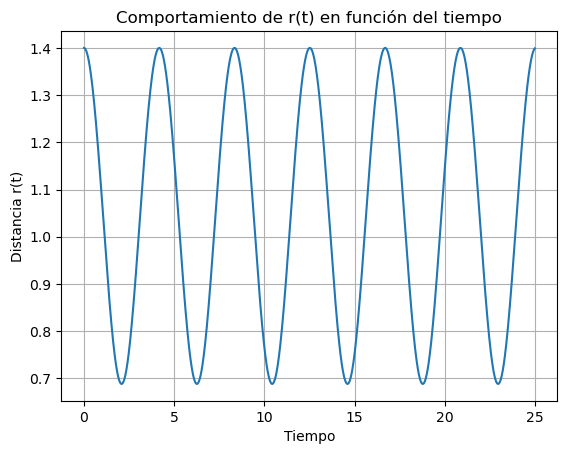

Valor en equilibrio de r(t): 1.0483805894364564
Valor máximo de r(t): 1.4
Valor mínimo de r(t): 0.6881839971591306


In [81]:
# Calcular r(t)
r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Graficar r(t)
plt.plot(t, r)
plt.xlabel('Tiempo')
plt.ylabel('Distancia r(t)')
plt.title('Comportamiento de r(t) en función del tiempo')
plt.grid(True)
plt.show()

# Calcular el valor en equilibrio, máximo y mínimo de r(t)
r_equilibrio = np.mean(r)
r_max = np.max(r)
r_min = np.min(r)

print(f'Valor en equilibrio de r(t): {r_equilibrio}')
print(f'Valor máximo de r(t): {r_max}')
print(f'Valor mínimo de r(t): {r_min}')

## parcial

In [101]:
r_range = np.linspace(0.01, 3.1, 2500)
r_inicial = np.sqrt((x0_2 - x0_1)**2 + (y0_2 - y0_1)**2)

In [102]:
# Calcular r y l a lo largo de la simulación
r = np.sqrt((u[:, 4] - u[:, 0])**2 + (u[:, 6] - u[:, 2])**2)
l = momento_angular(u, r_range)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [95]:
U_ef = potEf(u, l, r_range)
r_inicial = np.sqrt((x0_2 - x0_1)**2 + (y0_2 - y0_1)**2)
E_mec_inicial = 0.5 * (v0x_1**2 + v0y_1**2 + v0x_2**2 + v0y_2**2) + 0.5 * w * (r_inicial - l0)**2

ValueError: operands could not be broadcast together with shapes (2500,) (500,) 

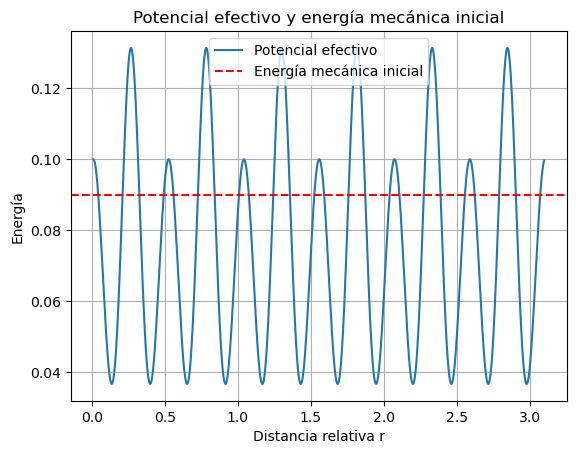

In [89]:
plt.plot(r_range, U_ef, label='Potencial efectivo')
plt.axhline(y = E_mec_inicial, color='r', linestyle='--', label='Energía mecánica inicial')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial')
plt.legend()
plt.grid(True)
plt.show()

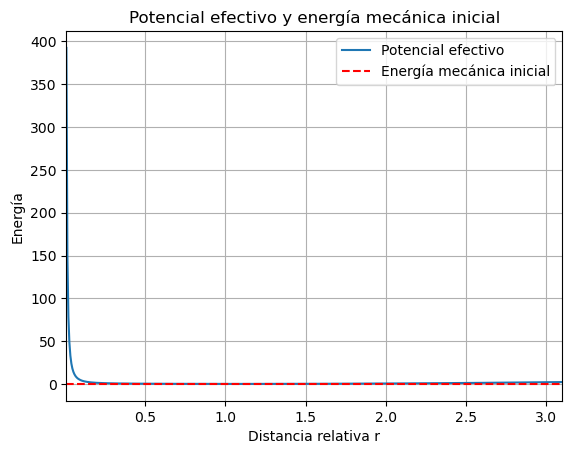

In [90]:
# Crear un arreglo de valores de r en el rango deseado
r_range = np.linspace(0.01, 3.1, 500)  # 500 puntos entre 0.01 y 3.1

# Calcular el potencial efectivo para cada valor de r en el rango
U_ef_range = 0.5 * w * (r_range - l0)**2 + (l[0]**2) / (2 * r_range**2)  # Usamos l[0] como una aproximación del momento angular

# Graficar el potencial efectivo y la energía mecánica inicial
plt.plot(r_range, U_ef_range, label='Potencial efectivo')
plt.axhline(y=E_mec_inicial, color='r', linestyle='--', label='Energía mecánica inicial')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial')
plt.xlim(0.01, 3.1)
plt.legend()
plt.grid(True)
plt.show()

# b

### Centro de masas moviéndose en la dirección de x > 0 con una velocidad de 0.05 y oscilación más asimétrica respecto a la posición de equilibrio::

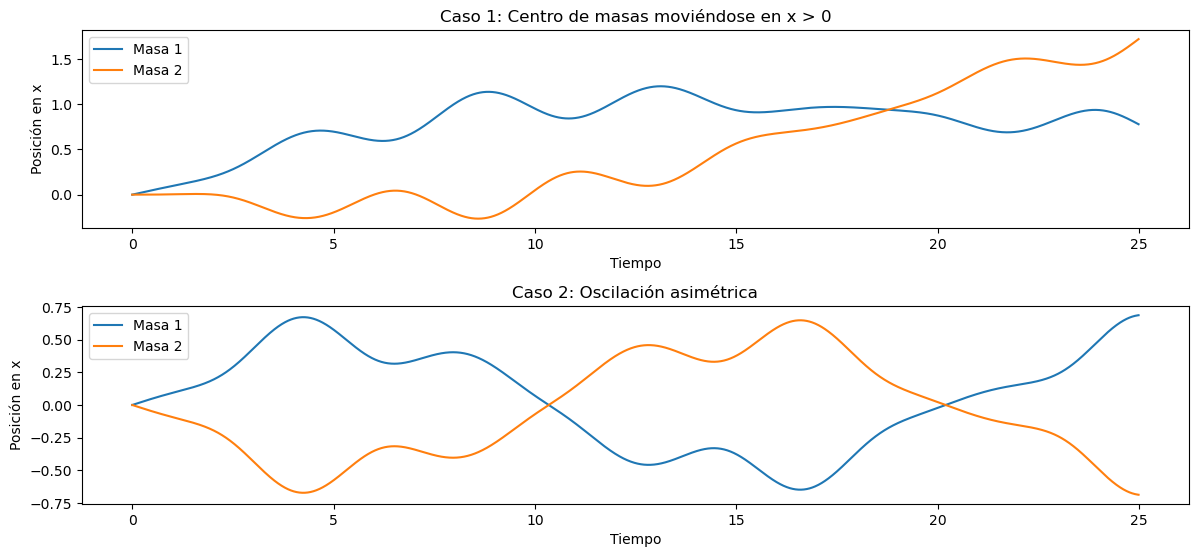

In [91]:
# Condiciones iniciales para cada caso
u0_case1 = np.array([0, 0.1, 0.7, 0, 0, 0.0, -0.7, 0])  # Centro de masas moviéndose en x > 0
u0_case2 = np.array([0, 0.1, 1.0, 0, 0, -0.1, -0.4, 0])  # Oscilación asimétrica

# Simulación para cada caso
t, u_case1 = rk4(resorte, u0_case1, t0, tf, h)
t, u_case2 = rk4(resorte, u0_case2, t0, tf, h)

# Graficar cada caso
plt.figure(figsize=(12, 8))

# Caso 1: Centro de masas moviéndose en x > 0
plt.subplot(3, 1, 1)
plt.plot(t, u_case1[:, 0], label='Masa 1')
plt.plot(t, u_case1[:, 4], label='Masa 2')
plt.xlabel('Tiempo')
plt.ylabel('Posición en x')
plt.title('Caso 1: Centro de masas moviéndose en x > 0')
plt.legend()

# Caso 2: Oscilación asimétrica
plt.subplot(3, 1, 2)
plt.plot(t, u_case2[:, 0], label='Masa 1')
plt.plot(t, u_case2[:, 4], label='Masa 2')
plt.xlabel('Tiempo')
plt.ylabel('Posición en x')
plt.title('Caso 2: Oscilación asimétrica')
plt.legend()

plt.tight_layout()
plt.show()

### Movimiento circular de cada masa:

In [92]:
# Condiciones iniciales para movimiento circular
x0_1 = -0.5
y0_1 = 0
x0_2 = 0.5
y0_2 = 0

# Velocidades iniciales para mantener el movimiento circular
v0x_1 = 0
v0y_1 = w * (l0 / 2)
v0x_2 = 0
v0y_2 = -w * (l0 / 2)

# Arreglo que contiene las condiciones iniciales
u0_circular = np.array([x0_1, v0x_1, y0_1, v0y_1, x0_2, v0x_2, y0_2, v0y_2])


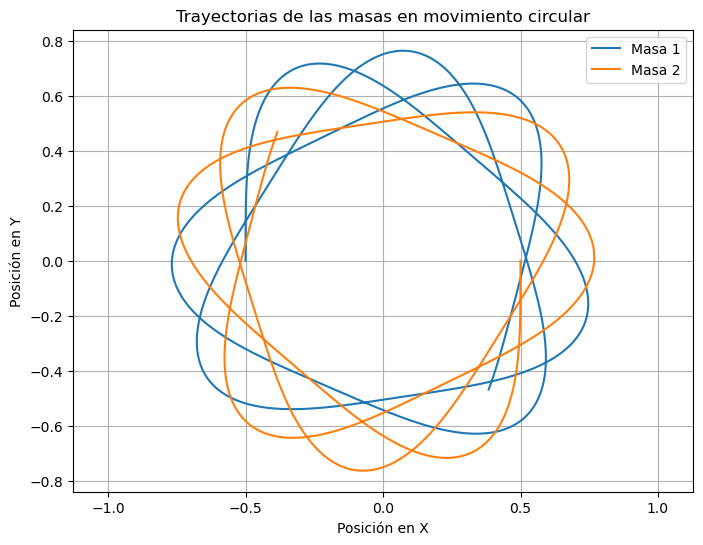

In [93]:
# Simulación del movimiento circular
t_circular, u_circular = rk4(resorte, u0_circular, t0, tf, h)

# Extraer posiciones de las masas
x1_circular = u_circular[:, 0]
y1_circular = u_circular[:, 2]
x2_circular = u_circular[:, 4]
y2_circular = u_circular[:, 6]

# Graficar las trayectorias de las masas
plt.figure(figsize=(8, 6))
plt.plot(x1_circular, y1_circular, label='Masa 1')
plt.plot(x2_circular, y2_circular, label='Masa 2')
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.title('Trayectorias de las masas en movimiento circular')
plt.legend()
plt.axis('equal')  # Asegurar que los ejes tengan la misma escala
plt.grid(True)
plt.show()

# 2

In [94]:
def bulirsch_stoer_step(f, u, t, h):
    """
    Un paso del algoritmo de Bulirsch-Stoer.
    Aquí iría la implementación específica del paso de Bulirsch-Stoer.
    
    Parámetros:
    - f: La función de la ecuación diferencial d⃗u/dt = f⃗(u, t).
    - u: El estado actual del sistema.
    - t: El tiempo actual.
    - h: El paso de tiempo para la integración.
    
    Retorna:
    - u_next: El estado del sistema en el tiempo t+h.
    """
    # Implementación específica aquí
    u_next = u # Esto es solo un marcador de posición
    return u_next

def bulirsch_stoer_multiple(f, u0, t0, tf, H):
    """
    Resuelve la ecuación diferencial d⃗u/dt = f⃗(u, t) desde t0 a tf con pasos de H
    utilizando el método de Bulirsch-Stoer para múltiples pasos de tiempo.
    
    Parámetros:
    - f: La función de la ecuación diferencial.
    - u0: El estado inicial del sistema.
    - t0: El tiempo inicial.
    - tf: El tiempo final.
    - H: El paso de tiempo grande para cada intervalo.
    
    Retorna:
    - ts: Los tiempos en los que se calculó la solución.
    - us: La solución calculada en los tiempos ts.
    """
    ts = [t0]
    us = [u0]
    t = t0
    u = u0
    
    while t < tf:
        h = min(H, tf - t) # Ajusta el último paso si es necesario
        u = bulirsch_stoer_step(f, u, t, h)
        t += h
        ts.append(t)
        us.append(u)
    
    return np.array(ts), np.array(us)
